1. Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Read the data as a data frame

In [4]:
df = pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


3. Perform basic EDA which should include the following
and print out your insights at every step.
    a. Shape of the data
    b. Data type of each attribute
    c. Checking the presence of missing values
    d. 5 point summary of numerical attributes
    e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
    f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
    columns
    g. Checking the presence of outliers in ‘bmi’, ‘age’ and
    ‘charges columns
    h. Distribution of categorical columns (include
    children)
    i. Pair plot that includes all the columns of the data
    frame

In [5]:
#a
print("Shape",df.shape)
#b
print("Data Type of Each Attributes",df.info())
#c
print("Missing values present",df.isnull().any())
#d
print("Five point summary \n",df.describe())


Shape (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
Data Type of Each Attributes None
Missing values present age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool
Five point summary 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.00

In [6]:
print(df['age'].mode()) 
print(df['bmi'].mode()) 
print(df['charges'].mode()) 

0    18
dtype: int64
0    32.3
dtype: float64
0    1639.5631
dtype: float64


Mean:  39.20702541106129 
Median:  39.0 
Mode:  18


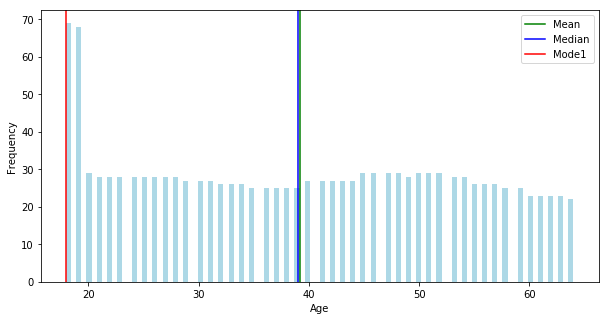

In [7]:
#e
mean_age=df['age'].mean()
median_age=df['age'].median()
mode_age=df['age'].mode()


print('Mean: ',mean_age,'\nMedian: ',median_age,'\nMode: ',mode_age[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(df['age'],bins=100,color='lightblue') #Plot the histogram
plt.axvline(mean_age,color='green',label='Mean')     
plt.axvline(median_age,color='blue',label='Median')
plt.axvline(mode_age[0],color='red',label='Mode1')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Age')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()


Mean:  30.663396860986538 
Median:  30.4 
,Mode: 32.3


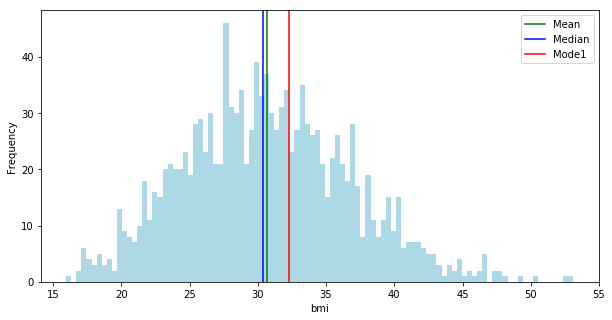

In [8]:
#e
mean_bmi=df['bmi'].mean()
median_bmi=df['bmi'].median()
mode_bmi=df['bmi'].mode()


print('Mean: ',mean_bmi,'\nMedian: ',median_bmi,'\n,Mode:',mode_bmi[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(df['bmi'],bins=100,color='lightblue') #Plot the histogram
plt.axvline(mean_bmi,color='green',label='Mean')     
plt.axvline(median_bmi,color='blue',label='Median')
plt.axvline(mode_bmi[0],color='red',label='Mode1')


plt.xlabel('bmi')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()


Mean:  13270.422265141257 
 Median:  9382.033 
,Mode: 1639.5631


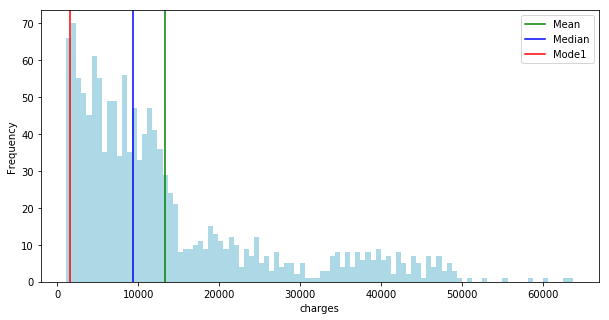

In [9]:
#e
mean_charge=df['charges'].mean()
median_charge=df['charges'].median()
mode_charge=df['charges'].mode()


print('Mean: ',mean_charge,'\n Median: ',median_charge,'\n,Mode:',mode_charge[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(df['charges'],bins=100,color='lightblue') #Plot the histogram
plt.axvline(mean_charge,color='green',label='Mean')     
plt.axvline(median_charge,color='blue',label='Median')
plt.axvline(mode_charge[0],color='red',label='Mode1')


plt.xlabel('charges')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

In [10]:
#f
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


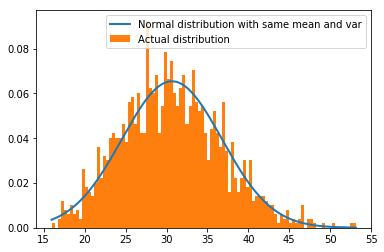

In [11]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['bmi'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


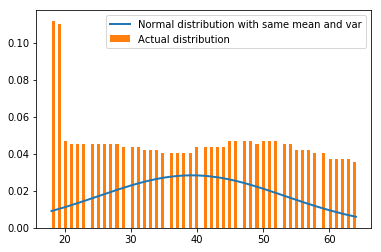

In [12]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['age'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


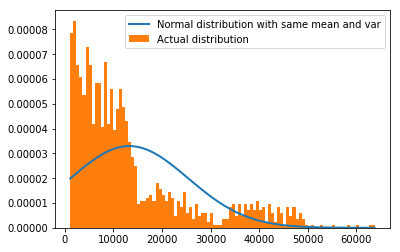

In [53]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [13]:
#Mode< Median< Mean then the distribution is positively skewed.
print("Age- Mode-Median-Mean ",mode_age[0],median_age,mean_age)
print("Age is positively Skewed")
print("Bmi- Mode-Median-Mean ",mode_bmi[0],median_bmi,mean_bmi)
print("Bmi is Negatively skewed")
print("Charge- Mode-Median-Mean ",mode_charge[0],median_charge,mean_charge)
print("charge is Positively skewed")

Age- Mode-Median-Mean  18 39.0 39.20702541106129
Age is positively Skewed
Bmi- Mode-Median-Mean  32.3 30.4 30.663396860986538
Bmi is Negatively skewed
Charge- Mode-Median-Mean  1639.5631 9382.033 13270.422265141257
charge is Positively skewed


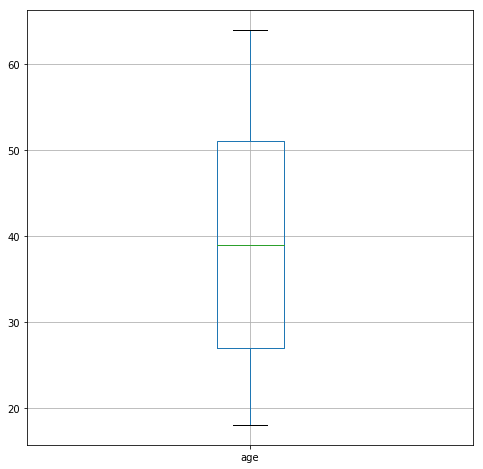

In [14]:
#g
df.boxplot(column="age",return_type='axes',figsize=(8,8))

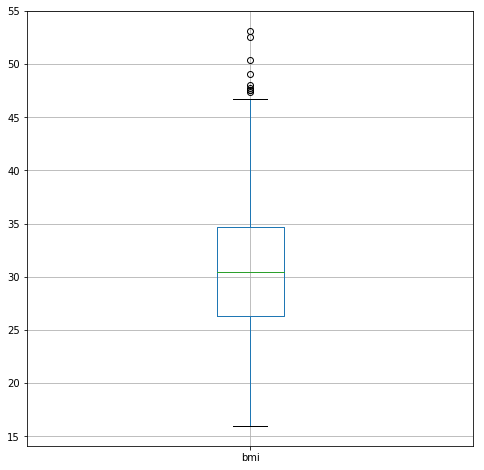

In [12]:
df.boxplot(column="bmi",return_type='axes',figsize=(8,8))

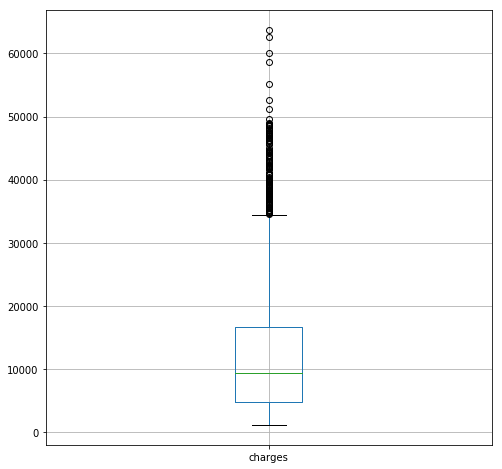

In [13]:
df.boxplot(column="charges",return_type='axes',figsize=(8,8))

From the above we can see that bmi and charges are having outliers

Text(0.5, 1.0, 'children vs charges')

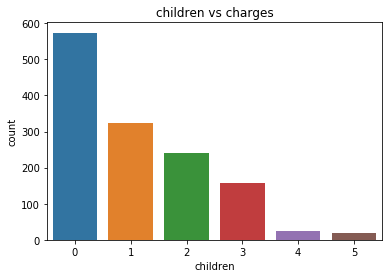

In [15]:
#h
sns.countplot(df['children'])

plt.title('children vs charges')

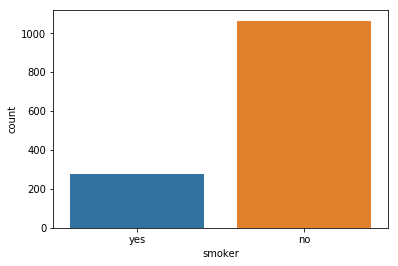

In [15]:
sns.countplot(df['smoker'])

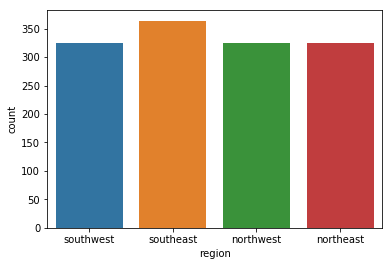

In [16]:
sns.countplot(df['region'])

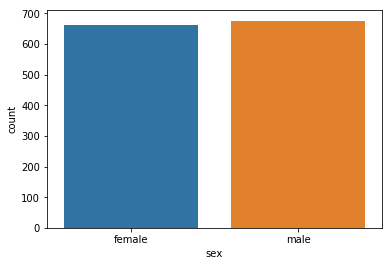

In [17]:
sns.countplot(df['sex'])

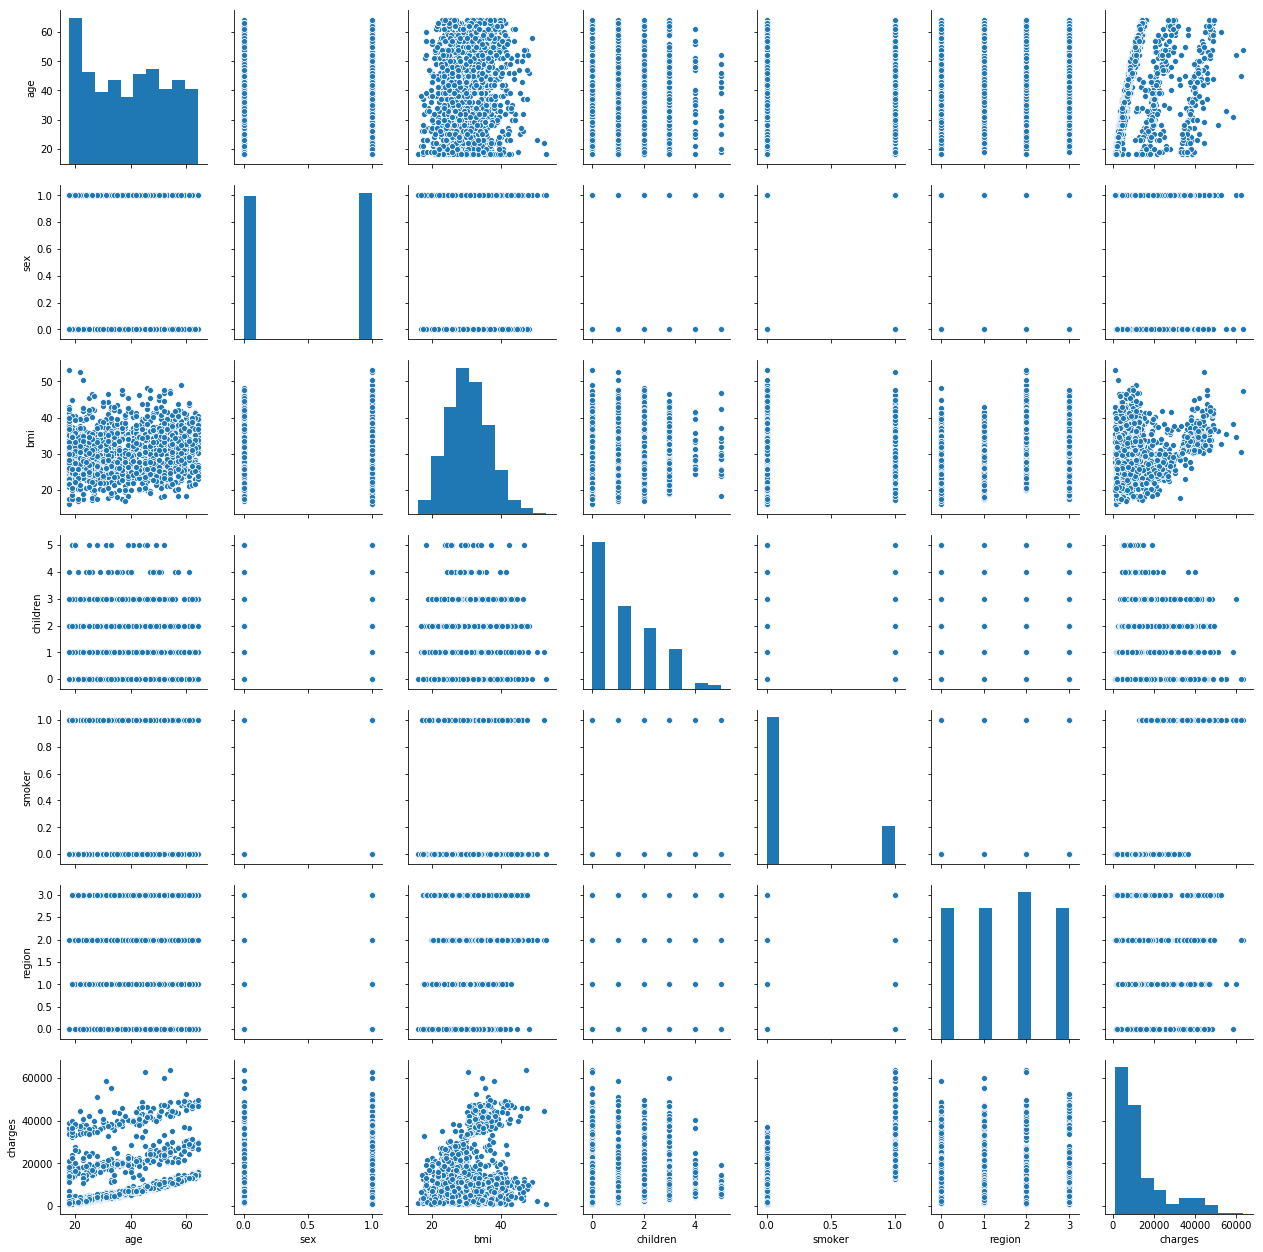

In [18]:
#i
import copy
from sklearn.preprocessing import LabelEncoder


insurance_df_encoded = copy.deepcopy(df)
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  #pairplot
plt.show()

4. Answer the following questions with statistical evidence
    a. Do charges of people who smoke differ significantly
    from the people who don't?
    b. Does bmi of males differ significantly from that of
    females?
    c. Is the proportion of smokers significantly different
    in different genders?
    d. Is the distribution of bmi across women with no
    children, one child and two children, the same ?

In [24]:
insurance_df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [26]:
#a
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"  

x = np.array(insurance_df_encoded[insurance_df_encoded.smoker == 1].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df_encoded[insurance_df_encoded.smoker == 0].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test
print("p_value",p_value)

if p_value < 0.05:  
    print(Ha)
else:
    print(Ho)


p_value 8.271435842177219e-283
Charges of smoker and non-smoker are not the same


In [28]:
#b
insurance_df_encoded.sex.value_counts() 

1    676
0    662
Name: sex, dtype: int64

In [31]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print("p-Value",p_value)
if p_value < 0.05:  # Setting our significance level at 5%
    print(Ha)
else:
    print(Ho)

p-Value 0.08997637178984932
Gender has no effect on bmi


In [35]:
#c
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print("P-Value",p_value)

if p_value < 0.05:  # Setting our significance level at 5%
    print(Ha)
else:
    print(Ho)
crosstab

P-Value 0.006548143503580696
Gender has an effect on smoking habits


smoker,no,yes
sex,,
female,547,115
male,517,159


In [37]:
#d


Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)
print("p-Value",p_value)


if p_value < 0.05:  # Setting our significance level at 5%
    print(Ha)
else:
    print(Ho)

p-Value 0.7158579926754841
No. of children has no effect on bmi
